---


# **Bank Marketing Campaign**


---

---
##Business Problem Understanding
---

**Context**

Jenis produk keuangan yang digunakan masyarakat semakin bervariasi. Salah satu produk keuangan yang banyak dikenal masyarakat adalah deposito berjangka. Mekanisme deposito berjangka adalah nasabah menyetorkan sejumlah uangnya ke bank atau lembaga keuangan, dan uang tersebut baru dapat ditarik setelah jangka waktu tertentu. Sebagai imbalannya, nasabah akan diberikan bunga tetap sesuai dengan jumlah nominal uang yang disetorkan.

Meski demikian, sebagai badan usaha yang memiliki produk keuangan dan nasabah masing-masing, bank tetap harus bersaing agar tidak kehilangan nasabah. Salah satu cara untuk mendapatkan nasabah baru adalah dengan melakukan marketing campaign.

Target :

No (0) : Apabila nasabah tidak tertarik deposit

Yes (1) : Apabila nasabah tertarik deposit



**Problem Statement**

Proses Marketing campaign bank perlu memperkirakan waktu dan sumber daya untuk menargetkan nasabah. Apabila campaign dilakukan kepada semua nasabah, biaya dan usaha yang dikeluarkan akan sangat besar, sehingga perlu dilakukan pemilihan ke beberapa nasabah tertentu saja. Bank perlu meningkatkan efisiensi campaign dengan mengetahui kandidat nasabah mana yang tertarik menempatkan depositnya ke bank.

**Goals**

Berdasarkan problem statement tersebut, bank perlu memiliki kemampuan untuk memprediksi kemungkinan seorang kandidat tertarik menempatkan depositnya atau tidak, sehingga campaign dapat difokuskan kepada nasabah yang tertarik untuk menempatkan deposit ke bank.

Lebih lanjut, ank perlu mengetahui faktor apa saja yang dapat membuat seorang nasabah tersebut tertarik untuk menempatkan deposito, sehingga mereka dapat membuat rencana yang lebih baik dalam pendekatan penawaran produk deposito.

**Analytic Approach**

Penelitian ini akan melakukan analisa untuk menemukan pola yang membedakan kandidat yang tertarik menempatkan deposito atau tidak. Selanjutnya, model klasifikasi akan dibangun untuk membantu bank memprediksi peluang seorang nasabah tertarik menempatkan deposito atau tidak.

**Metric Evaluation**

Type 1 error : False Positive

*   Konsekuensi: sia-sianya biaya marketing campaign, waktu dan sumber daya

Type 2 error : False Negative

*   Konsekuensi: kehilangan calon nasabah

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi biaya marketing campaign dari bank tersebut, tetapi tanpa membuat menjadi kurangnya/tidak cukup kandidat nasabah yang dibutuhkan bank. Jadi kita ingin sebanyak mungkin prediksi kelas positif yang benar, dengan sesedikit mungkin prediksi false positive. metric utama yang akan kita gunakan adalah `roc_auc`.

---
##Data Understanding
---

### Attribute Information

| Attribute | Data Type | Description |
| --- | --- | --- |
| age | numeric | Age of customer
| job | categorical | Type of job
| balance | numeric | Customer's account balance |
| housing | binary | Customer is having a housing loan
| loan | binary | Customer is having a personal loan
| contact | categorical | type of contact method
| month | categorical | Last contact month
| campaign | numeric | Number of contacts performed during the campaign
| pdays | numeric | Number of days passed after the prospective customer was last contacted from the previous campaign
| poutcome | categorical | Outcome of the previous campaign
| deposit | binary | "yes" if customer interested to deposit; "no" if customer not interested to deposit.

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
#Load Dataset
df = pd.read_csv("data_bank_marketing_campaign.csv")
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


In [ ]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


---
##Data Cleaning
---

Tidak ada data yang hilang/kosong sehingga siap dipakai untuk melakukan analisa terhadap masalah dan pembuatan model.

In [ ]:
listData = []
for col in df.columns:
    listData.append([col, df[col].count() ,df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col]))*100,2), df[col].nunique(), df[col].unique()])

df1 = pd.DataFrame(columns=['Columns','CountData', 'DataType', 'Null','%Null','Nunique','Values'],data=listData)
display(df1)

,Columns,CountData,DataType,Null,%Null,Nunique,Values
0,age,7813,int64,0,0.0,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 3..."
1,job,7813,object,0,0.0,12,"[admin., self-employed, services, housemaid, t..."
2,balance,7813,int64,0,0.0,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, ..."
3,housing,7813,object,0,0.0,2,"[no, yes]"
4,loan,7813,object,0,0.0,2,"[no, yes]"
5,contact,7813,object,0,0.0,3,"[cellular, telephone, unknown]"
6,month,7813,object,0,0.0,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, ..."
7,campaign,7813,int64,0,0.0,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28..."
8,pdays,7813,int64,0,0.0,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412,..."
9,poutcome,7813,object,0,0.0,4,"[unknown, other, failure, success]"


Berdasarkan tabel di atas, karena tidak ada nilai null maka data dapat dikatakan lengkap. Selanjutnya duplikat, error data types, dan error values per kolom akan diperiksa.

###Data Duplicate

In [ ]:
check_duplicate = df.duplicated().sum().sum()
results = print(f'Number Of Duplicate Data : ',check_duplicate)
display(results,df[df.duplicated()])

Number Of Duplicate Data :  8


None

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
2944,40,blue-collar,0,yes,no,unknown,may,2,-1,unknown,no
4368,60,management,0,no,no,cellular,aug,3,-1,unknown,yes
4874,41,management,0,no,no,cellular,aug,2,-1,unknown,no
5326,44,blue-collar,0,yes,no,cellular,jul,1,-1,unknown,no
5609,39,technician,0,yes,no,unknown,may,1,-1,unknown,no
5681,38,technician,0,no,no,cellular,aug,2,-1,unknown,no
5905,34,management,0,no,no,cellular,aug,2,-1,unknown,no
7077,30,blue-collar,239,yes,no,unknown,may,1,-1,unknown,yes


Terdapat 8 data duplikat.

Namun, data duplikat tidak sepenuhnya memiliki value yang sama pada setiap kolom. Misalnya, pada kolom `age`, setiap value berbeda, yang menyiratkan bahwa setiap data mewakili calon nasabah yang berbeda. sehingga 8 data duplikat yang teridentifikasi tidak akan dihapus.

###Error Data Type

Berdasarkan tabel di atas, dataset tidak memiliki error data types sehingga tidak ada yang perlu diubah.

In [ ]:
df.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


### Check Data per Column

1. Age

Data `age` dipastikan sesuai. Tipe data `age` berupa angka (INT64) dengan non-negative value yang memenuhi syarat memiliki rekening bank dengan usia minimal 18 tahun.

In [ ]:
df3 = df.copy()

def category_age(x):
    if x <= 32:
        return 'Young'
    elif 32 < x <= 39:
        return 'Middle'
    elif 39 < x <= 49:
        return 'Adult'
    else:
        return 'Old'

df3['category_age'] = df3['age'].apply(category_age)
custom_order = ['Young', 'Middle', 'Adult', 'Old']
df3['category_age'] = pd.Categorical(df3['category_age'], categories=custom_order, ordered=True)
df3.groupby('category_age')['deposit'].value_counts(normalize=True).unstack().fillna(0) * 100

deposit,no,yes
category_age,,
Young,47.698945,52.301055
Middle,55.697446,44.302554
Adult,59.366466,40.633534
Old,46.505376,53.494624


Note : Kategori **Young** dan **Old** Usia lebih banyak nasabah dengan deposit marketing campaign yang disarankan, sedangkan Kategori **Middle** dan **Adult** Usia lebih banyak nasabah tanpa deposit marketing campaign.

2. contact

In [ ]:
df.contact.unique()

array(['cellular', 'telephone', 'unknown'], dtype=object)

Note : Walaupun tidak ada data yang *null*, namun nilai pada kolom `contact` tetap memiliki nilai "unknown" yang menandakan informasi tidak lengkap.

3. pdays

In [ ]:
df.pdays.min()

-1

Note : Nilai '-1' pada kolom `pdays` menunjukkan bahwa nasabah akan dihubungi besok.

4. poutcome

In [ ]:
df.poutcome.unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

Note : Walaupun tidak ada data yang *null*, namun nilai pada kolom `poutcome` tetap memiliki nilai "unknown" yang menandakan informasi tidak lengkap.

---
## Data Analysis
---

selanjutnya ke tahap Analisa Data untuk keperluan masalah yang dihadapi.

Text(0.5, 1.0, 'Pesebaran Deposit')

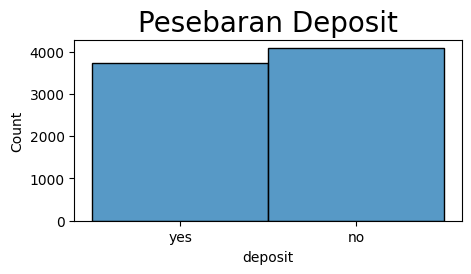

In [ ]:
plt.figure(figsize=(5,8))

plt.subplot(311)
sns.histplot(data=df,x='deposit')
plt.title('Pesebaran Deposit',fontsize=20)

Plot di atas menunjukkan sebaran data nasabah yang tertarik melakukan deposit dan tidak. kita tidak perlu *handling imbalance* karena persebaran data seimbang. selanjutnya kita akan melihat bagaimana data `deposit` dibandingkan dengan `housing`, `loans`, `contacts`, dan `employment`.

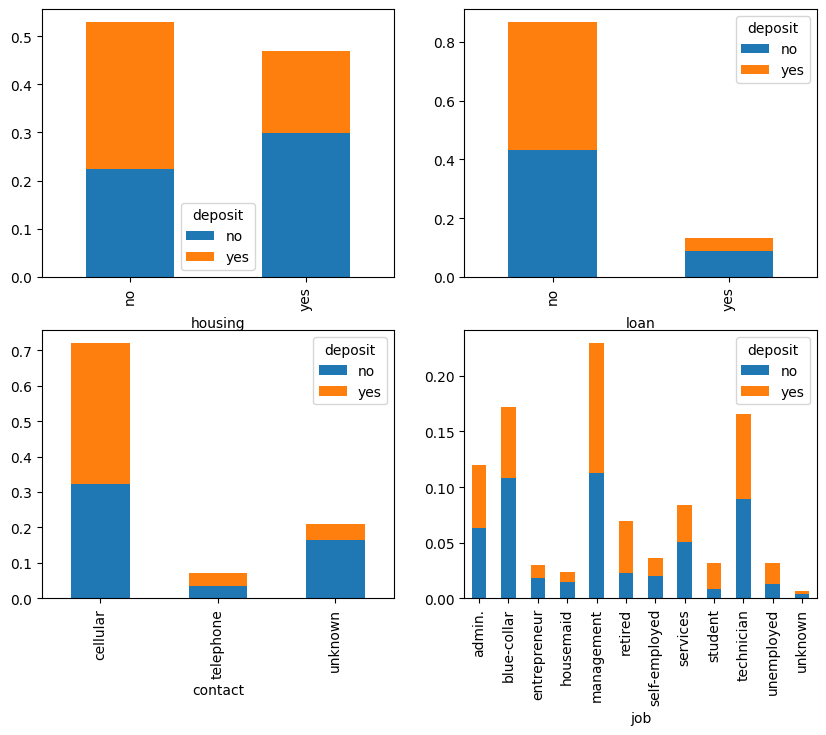

In [ ]:
count = 0
fig = plt.figure(figsize=(10,16))
for i in df[['housing','loan','contact','job']]:
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['deposit'],normalize=True).plot(kind='bar',stacked=True,ax=ax)
plt.show()

Berdasarkan barplot di atas,
* Nasabah yang tidak memiliki `housing` loan cenderung memiliki potensi minat terhadap deposit yang lebih tinggi dibandingkan dengan yang memiliki `housing` loan.
* Nasabah yang tidak memiliki personal `loan` cenderung memiliki potensi minat terhadap deposit yang lebih tinggi dibandingkan dengan yang memiliki `loan`.

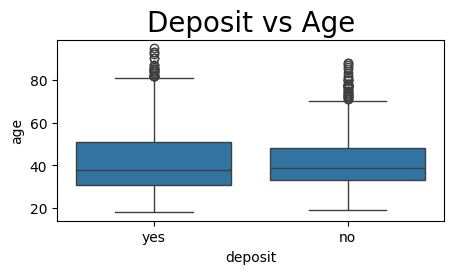

In [ ]:
plt.figure(figsize=(5,8))
plt.subplot(312)
sns.boxplot(data=df, x='deposit', y ='age')
plt.title('Deposit vs Age',fontsize=20)

plt.show()

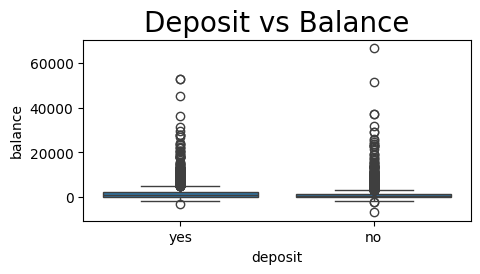

In [ ]:
plt.figure(figsize=(5,8))
plt.subplot(313)
sns.boxplot(data=df, x='deposit', y ='balance')
plt.title('Deposit vs Balance',fontsize=20)

plt.show()

Berdasarkan grafik di atas, dapat disimpulkan bahwa:

* Usia nasabah yang tertarik deposit atau tidak tertarik memiliki rentang nilai yang sama, dengan nilai median sekitar 40 tahun.
*Pada grafik Deposit vs Balance terdapat *outlier* apakah nasabah tertarik melakukan deposit atau tidak. Dalam hal ini, data *outlier* tidak akan dihilangkan karena jumlah datanya besar.


---
##Data Processing
---

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
# # Library

# import pandas as pd
# import numpy as np

# # Visualization
# import matplotlib.pyplot as plt
# import seaborn as sns
# import missingno
# from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

# Model
import pickle
import joblib

###Data Preparation

In [ ]:
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


Berdasarkan data yang kita punya,

*One-hot encoding* , teknik yang digunakan untuk mengubah variabel kategorik ke dalam format yang dapat disediakan bagi algoritma *machine learning* untuk melakukan pekerjaan prediksi dengan lebih baik, perlu diterapkan. Banyak algoritma *machine learning* tidak dapat bekerja dengan data kategorik secara langsung dan memerlukan numerical input. *One-hot encoding* adalah cara untuk mengubah data kategorik menjadi data numerik.

selanjutnya, ***One Hot Encoding*** akan diaplikasikan ke kolom `job`, `housing`, `loan`, `contact`, `month`, `poutcome` karena kolom ini tidak ordinal, dan juga memiliki jumlah data unik yang sedikit.

In [ ]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']),
], remainder='passthrough')

kita gunakan `OneHotEncoder(drop='first')`. Parameter *drop='first'* digunakan untuk menghindari **Multikolinearitas** dengan drop kategori pertama.
* Multikolinearitas mengacu pada situasi dalam model statistik di mana dua atau lebih variabel prediktor berkorelasi tinggi, artinya variabel tersebut mengandung informasi serupa tentang varians dalam data. Hal ini dapat menjadi masalah dalam analisis regresi karena melemahkan signifikansi statistik dari variabel independen.

### Train-Test Split

dataset `df` dibagi menjadi fitur x dan target y.
selanjutnya data dibagi menjadi training and testing sets menggunakan `train_test_split`, dengan stratifikasi untuk mempertahankan class distribution dan **test size 20%.**

In [ ]:
x = df.drop(columns=['deposit'])
y = df['deposit']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=2022)

###Training Data Preprocessing

`transformer` digunakan dan diterapkan ke data pelatihan (`x_train`) untuk mengubah menjadi format yang sesuai untuk model train.

In [ ]:
x_train_preprocessed = transformer.fit_transform(x_train).toarray()
x_train_preprocessed

array([[ 0.000e+00,  0.000e+00,  0.000e+00, ...,  1.076e+03,  1.000e+00,
         9.600e+01],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  2.488e+03,  1.000e+00,
        -1.000e+00],
       [ 0.000e+00,  1.000e+00,  0.000e+00, ..., -7.010e+02,  2.000e+00,
        -1.000e+00],
       ...,
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  0.000e+00,  1.000e+00,
        -1.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  7.050e+02,  2.000e+00,
         3.500e+01],
       [ 0.000e+00,  0.000e+00,  0.000e+00, ...,  3.710e+02,  1.000e+00,
        -1.000e+00]])

In [ ]:
testing = pd.DataFrame(x_train_preprocessed, columns = transformer.get_feature_names_out())
testing.dropna()

,onehot__job_blue-collar,onehot__job_entrepreneur,onehot__job_housemaid,onehot__job_management,onehot__job_retired,onehot__job_self-employed,onehot__job_services,onehot__job_student,onehot__job_technician,onehot__job_unemployed,onehot__job_unknown,onehot__housing_yes,onehot__loan_yes,onehot__contact_telephone,onehot__contact_unknown,onehot__month_aug,onehot__month_dec,onehot__month_feb,onehot__month_jan,onehot__month_jul,onehot__month_jun,onehot__month_mar,onehot__month_may,onehot__month_nov,onehot__month_oct,onehot__month_sep,onehot__poutcome_other,onehot__poutcome_success,onehot__poutcome_unknown,remainder__age,remainder__balance,remainder__campaign,remainder__pdays
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,33.0,1076.0,1.0,96.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,21.0,2488.0,1.0,-1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0,-701.0,2.0,-1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35.0,1330.0,1.0,-1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,30.0,0.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32.0,-1.0,2.0,-1.0
6246,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29.0,502.0,2.0,199.0
6247,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34.0,0.0,1.0,-1.0
6248,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,705.0,2.0,35.0


##Modelling and Evaluation

In [ ]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
# xgb = XGBClassifier()
# lgbm = lgb.LGBMClassifier()

###Model K-Fold

4 Model (*Regresi Logistik, K-Nearest Neighbors, Decision Tree, Random Forest*) akan dievaluasi menggunakan *cross-validation* dengan *stratified k-fold* (k=5) pada data Train, dengan skor `ROC_AUC` sebagai metrik evaluasi yang digunakan.

*List* model (`logreg`, `knn`, `dt`, `rf`) ditentukan.
*List* kosong dibuat untuk menyimpan skor dari *cross-validation* , rata-rata, dan standar deviasi dari skor **ROC_AUC** . **ROC_AUC** digunakan untuk mengevaluasi kinerja model klasifikasi biner, yang membedakan variabel `y`, yitu nilai kolom `deposit` yang menjelaskan apakah nasabah tertarik deposit atau tidak.

In [ ]:
models = [logreg,knn,dt,rf]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'],'mean roc_auc':rata,'sdev':std}).set_index('model').sort_values(by='mean roc_auc',ascending=False)


,mean roc_auc,sdev
model,,
Random Forest,0.757453,0.020978
Logistic Regression,0.747381,0.027783
Decision Tree,0.617233,0.011474
KNN,0.612802,0.011247


Hasilnya,

***Random Forest*** muncul sebagai model dengan kinerja terbaik, diikuti oleh *Regresi Logistik*. *Decision Tree* dan *KNN* menunjukkan kinerja yang lebih rendah dibandingkan *Random Forest* dan *Logistic Regression*, dengan *KNN* sebagai kinerja terlemah. Evaluasi ini membantu dalam memilih model yang paling efektif untuk kumpulan data dan permasalahan yang dihadapi, dengan *Random Forest* dan Regresi Logistik menjadi pesaing utama berdasarkan metrik skor **ROC_AUC.**

###Test Data

Performa setiap model akan dievaluasi berdasarkan skor **ROC_AUC** dan mencetak laporan klasifikasi setiap model.

In [ ]:
models = [logreg,knn,dt,rf]
score_roc_auc = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    x_train,x_test

    estimator.fit(x_train,y_train)
    return(estimator,estimator.predict(x_test),x_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']):
    estimator,y_pred,x_test = y_pred_func(i)
    y_predict_proba = estimator.predict_proba(x_test)[:,1]
    score_roc_auc.append(roc_auc_score(y_test,y_predict_proba))
    print(j,'\n', classification_report(y_test,y_pred))

pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest'],
             'roc_auc score':score_roc_auc}).set_index('model').sort_values(by='roc_auc score',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

          no       0.70      0.74      0.72       816
         yes       0.69      0.65      0.67       747

    accuracy                           0.70      1563
   macro avg       0.70      0.69      0.70      1563
weighted avg       0.70      0.70      0.70      1563

KNN 
               precision    recall  f1-score   support

          no       0.60      0.62      0.61       816
         yes       0.57      0.54      0.55       747

    accuracy                           0.58      1563
   macro avg       0.58      0.58      0.58      1563
weighted avg       0.58      0.58      0.58      1563

Decision Tree 
               precision    recall  f1-score   support

          no       0.64      0.63      0.64       816
         yes       0.60      0.61      0.61       747

    accuracy                           0.62      1563
   macro avg       0.62      0.62      0.62      1563
weighted avg       0.62      0

,roc_auc score
model,
Random Forest,0.766145
Logistic Regression,0.762696
Decision Tree,0.622123
KNN,0.617440


Oleh karena itu, ***Random Forest*** muncul sebagai model dengan kinerja terbaik berdasarkan metrik **ROC_AUC**. Selanjutnya *Random Forest Classifier* akan dipilih dalam model.

###Export Implemented Data using Pickle

 `estimator_final` dibuat menggunakan **pickle** dan menyimpannya ke file bernama `Pickle_Model_rf.sav`. File ini nantinya dapat dimuat untuk menggunakan kembali model yang dilatih untuk membuat prediksi tanpa perlu train lagi dari awal.

In [ ]:
# # definisikan kembali estimator final yang akan digunakan yaitu Pipeline dengan model RandomForestClassifier
estimator_final = Pipeline([
        ('preprocess',transformer),
        ('model',rf)])

# # estimator di training kembali
estimator_final.fit(x_train, y_train)

# # Model Pickling
filename = 'Pickle_Model_rf.sav'
pickle.dump(estimator_final, open(filename,'wb'))

# # load dataset
bank_campaign = pd.read_csv('data_bank_marketing_campaign.csv')

# # load model
filename = 'Pickle_Model_rf.sav'
loaded_model = pickle.load(open(filename,'rb'))

Finally, loads both dataset and the pre-trained machine learning model into memory.

---
##Conclusion
---

In [ ]:
print('Classification Report Random Forest : \n', classification_report(y_test,y_pred))

Classification Report Random Forest : 
               precision    recall  f1-score   support

          no       0.70      0.75      0.72       816
         yes       0.70      0.64      0.67       747

    accuracy                           0.70      1563
   macro avg       0.70      0.70      0.70      1563
weighted avg       0.70      0.70      0.70      1563



Berdasarkan hasil classification report dari model kita, kita dapat menyimpulkan bahwa apabila nantinya model kita akan digunakan untuk memfilter list nasabah yang akan kita coba tawarkan, maka model kita dapat mengurangi 75% nasabah yang tidak tertarik untuk tidak kita approach, dan model kita dapat mendapatkan 65% nasabah yang tertarik dari seluruh nasabah yang tertarik melakukan deposit. (berdasarkan recall)

Model kita ini memiliki ketepatan prediksi nasabah yang tertarik melakukan deposito sebesar 71% (precisionnya), jadi setiap model kita dapat memprediksi bahwa seorang nasabah itu tertarik, maka kemungkinan tebakannya benar itu sebesar 71% kurang lebih. Maka masih akan ada nasabah yang sebenarnya tidak tertarik namun diprediksi sebagai nasabah yang tertarik sekitar 25% dari keseluruhan nasabah yang tidak tertarik (berdasarkan recall).

Bila seandainya biaya untuk screening/menyaring data per nasabah itu $18.34 (sumber: https://thefinancialbrand.com/news/bank-marketing/bank-marketing-budgets-advertising-roi-strategy-88835/), dan andaikan jumlah nasabah yang kita miliki untuk suatu kurun waktu sebanyak 200 orang (dimana andaikan 100 orang tertarik, dan 100 orang lagi tidak tertarik), maka hitungannya kurang lebih akan seperti ini :

Tanpa Model (semua nasabah kita cek dan tawarkan) :
- Total Biaya => 200 x 18.34 USD = 3668 USD
- Total nasabah Tertarik yang didapatkan => 100 orang (karena semua kita tawarkan)
- Total nasabah Tertarik yang tidak didapatkan => 0 orang (karena semua kita tawarkan)
- Biaya yang terbuang => 100 x 18.34 USD = 1834 USD (karena 100 orang menolak dan menjadi sia-sia)
- Jumlah penghematan => 0 USD

Dengan Model (hanya nasabah yang diprediksi oleh model tertarik yang kita check dan tawarkan) :
- Total Biaya => (65 x 18.34 USD) + (25 x 18.34 USD) = 1650.6 USD
- Total nasabah Tertarik yang didapatkan => 65 orang (karena recall yes/yg tertarik itu 65%)
- Total nasabah Tertarik yang tidak didapatkan => 35 orang (karena recall yes/yg tertarik itu 65%)
- Biaya yang terbuang => 25 x 18.34 USD = 458.5 USD (berdasarkan recall no/yg tidak tertarik (25 orang menolak tawaran/tidak tertarik))
- Jumlah penghematan => 75 x 18.34 USD = 1375.5 USD (yang dihitung hanya yang memang tidak tertarik saja, kalau yang tertarik tapi tidak ditawarkan itu tidak dihitung disini)

Berdasarkan contoh hitungan tersebut, terlihat bahwa dengan menggunakan model kita, maka Bank tersebut akan menghemat biaya yang cukup besar tanpa mengorbankan terlalu banyak jumlah nasabah potensial/nasabah yg tertarik.

---
##Recommendation
---

Hal-hal yang bisa dilakukan untuk mengembangkan project dan modelnya lebih baik lagi :

- Menambahkan fitur - fitur atau kolom - kolom baru yang kemungkinan bisa berhubungan dengan ketertarikannya, seperti gaji atau pendapatan, jabatan pekerjaannya sekarang (apakah karyawan, manager, direktur, dan sebagainya), status pernikahan, dll.

- Mencoba menggunakan model machine learning yang lain dan juga mencoba hyperparameter tuning kembali.

- Berdasarkan dataset, masih terdapat fitur `contact`, yang menandakan bahwa metode marketing masih menggunakan metode traditional marketing, seperti menawarkan deposit dengan cara menelpon nasabah. oleh karena itu akan lebih baik dan lebih efektif apabila menambahkan metode Digital Marketing Campaign.

# **Terima Kasih**